# IRIS Flower  Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("iris.data.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Display the number of samples for each species
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
#Converting class labels into numerical form

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])
data["species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

# Exploratory Data Analysis

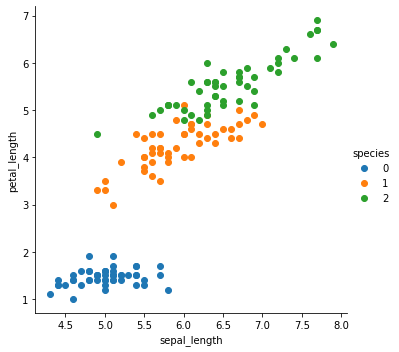

In [13]:
# Plotting the three verities of iris flowers
sns.FacetGrid(data,hue='species',height=5).map(plt.scatter,'sepal_length','petal_length').add_legend()

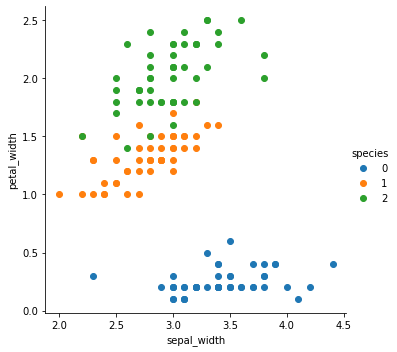

In [14]:
sns.FacetGrid(data,hue='species',height=5).map(plt.scatter,'sepal_width','petal_width').add_legend()

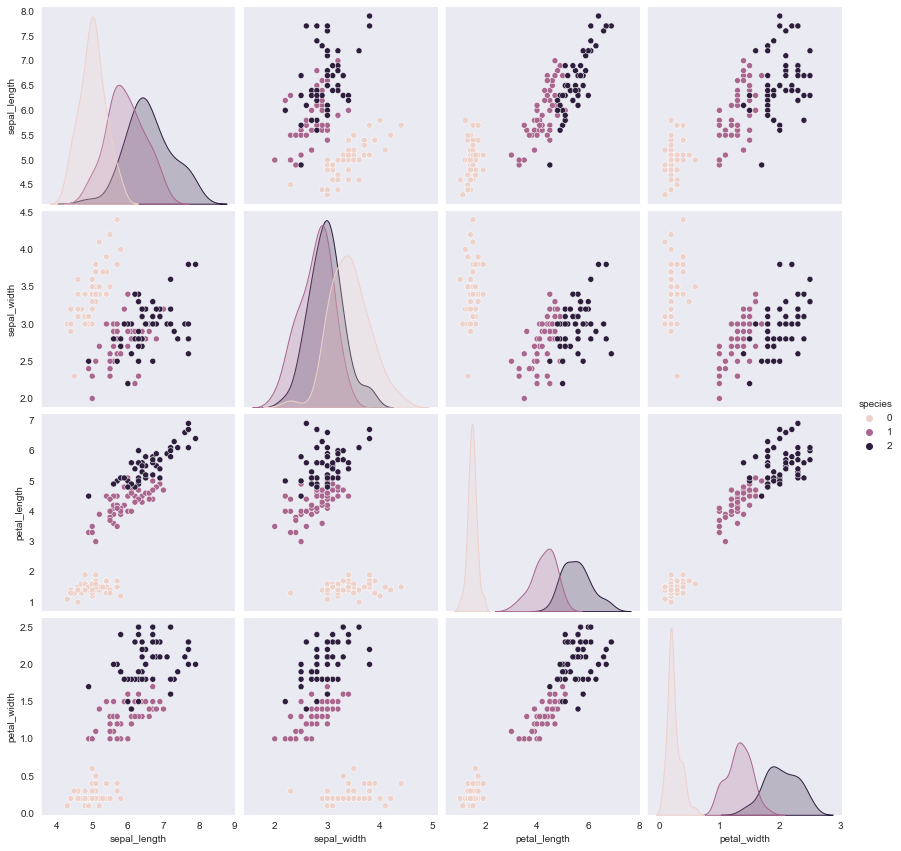

In [23]:
#Warning
import warnings
warnings.filterwarnings('ignore')


# Pairwise scatter plot: pair plot
#Dis-advantage are 1.can be used when number of features are high.
                #  2.cannot visualize higher dimensional patterns in 3D and 4
                # closes any previously open plots that might be displayed
        
plt.close() 
sns.set_style("dark")
sns.pairplot(data,hue="species",size=3)
plt.show()

<AxesSubplot:>

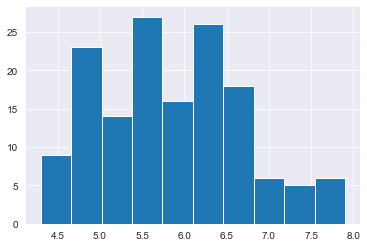

In [26]:
# Plotting histogram for each feature
data['sepal_length'].hist()

<AxesSubplot:>

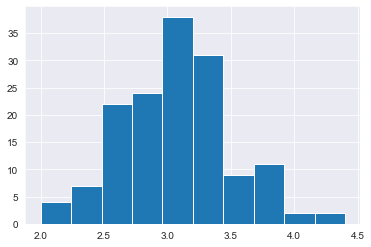

In [27]:
data['sepal_width'].hist()

<AxesSubplot:>

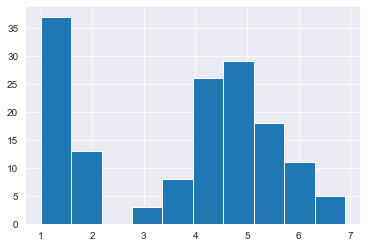

In [28]:
data['petal_length'].hist()

<AxesSubplot:>

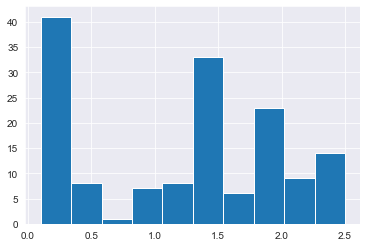

In [29]:
data['petal_width'].hist()

<AxesSubplot:>

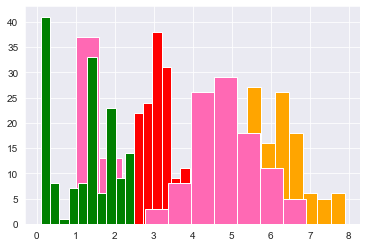

In [37]:
#Plotting histogram for all the features together
data['sepal_length'].hist(color='orange')
data['sepal_width'].hist(color='red')
data['petal_length'].hist(color='hotpink')
data['petal_width'].hist(color='green')

In [38]:
# Plot scatter plot to visualize relationships between features
species=[0,1,2]
color=['red','orange','lime']

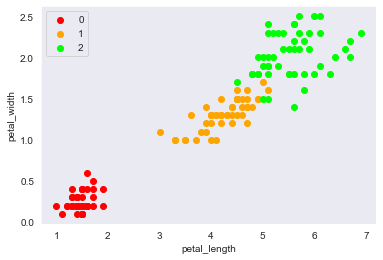

In [42]:
# Scatter plot for Petal Length vs Petal Width 
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = color[i], label=species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

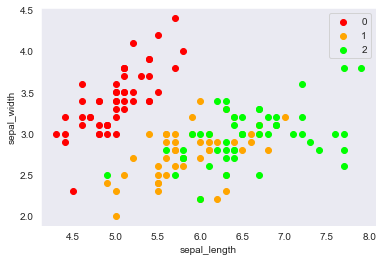

In [43]:
# scatter plot showing relation between Sepal Length and Sepal Width

for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=color[i], label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()
    

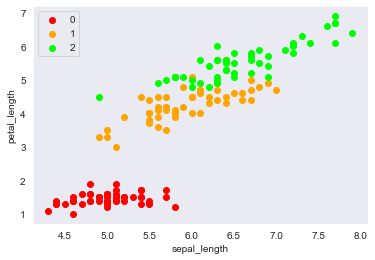

In [44]:
# Scatter plot for Petal Length vs Sepal Length
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = color[i], label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

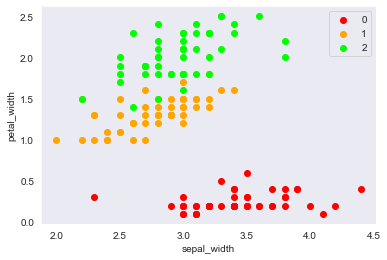

In [45]:
# Scatter plot for Sepal Width vs Petal Width
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = color[i], label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

# Correlation Matrix

In [46]:
# Finding the correlation matrix
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

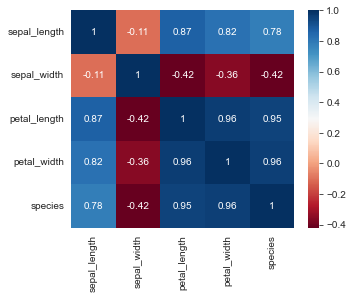

In [47]:
# displaying the correlation matrix using a heatmap
corr=data.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='RdBu') 

# Model Training

In [49]:
#splitting the data into features X and target Y

X = data.drop('species',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
y = data["species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

# Train-Test split

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3,random_state=1)

In [53]:
# Initializing logistic regression model

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

# model fitting
model1.fit(X_train,y_train)

# model accuracy
print("Accuracy(Logistic Regression): ",model1.score(X_test,y_test)*100)

# model1 can be optimized using standardscalar (The accuracy of optimized model will be 28.888 which creats difficulty while comparing with other model accuracies)

Accuracy(Logistic Regression):  97.77777777777777


In [54]:
# K-nearest model (KNN)

from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
print("Accuracy (KNN): ",model2.score(X_test,y_test)*100)

Accuracy (KNN):  97.77777777777777


### Decision Tree

In [55]:
#Decision Tree model

from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
print("Accuracy (DecisionTree): ",model3.score(X_test,y_test)*100)

Accuracy (DecisionTree):  95.55555555555556


# Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)


In [59]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

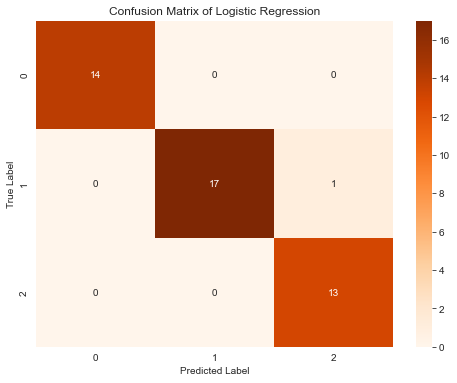

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

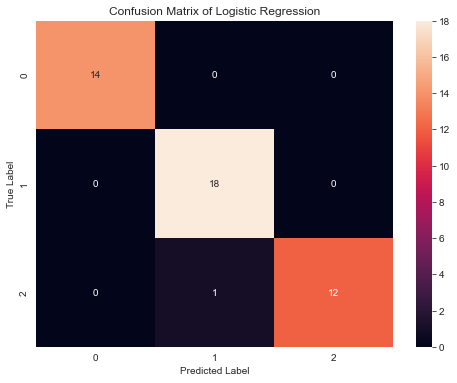

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='rocket', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

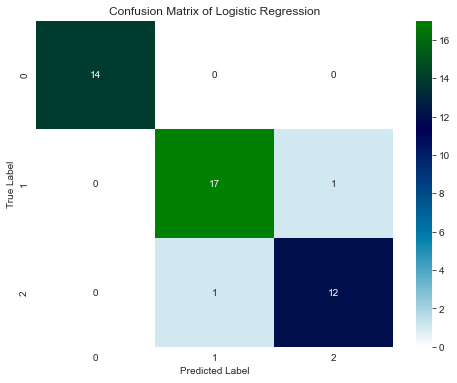

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='ocean_r', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()